<a href="https://colab.research.google.com/github/kchawale/Pandas/blob/main/asmt1_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')

In [3]:
df=pd.DataFrame(data=df)

In [5]:
print('Number of Rows : ',df.shape[0],'\nNumber of Columns : ',df.shape[1])

Number of Rows :  645 
Number of Columns :  7


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB


In [7]:
df.describe(include='all')

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [8]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [9]:
df.Price.value_counts()

45000     47
55000     29
36000     25
50000     22
100000    17
          ..
41999      1
23800      1
65999      1
67000      1
24800      1
Name: Price, Length: 153, dtype: int64

In [10]:
df.groupby('Sqft')['Price'].max().nlargest(1)

Sqft
3504.63    250000
Name: Price, dtype: int64

In [11]:
df.groupby('Sqft')['Price'].min().nsmallest(1)

Sqft
996.24    6100
Name: Price, dtype: int64

In [13]:
print('Total_Floor with maximum frequency : ',df['TotalFloor'].value_counts().idxmax())

Total_Floor with maximum frequency :  7


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
import warnings 
warnings.filterwarnings('ignore')

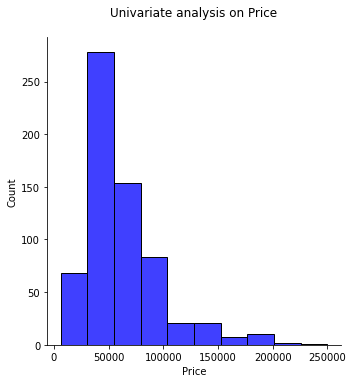

In [17]:
displot1=sns.displot(df['Price'],color='blue',bins=10)
displot1.set(title='Univariate analysis on Price\n')

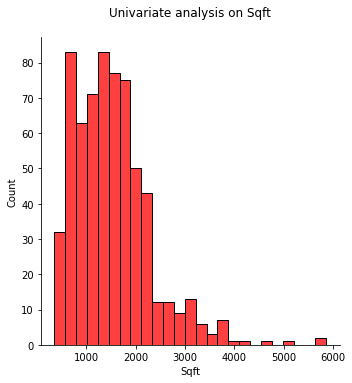

In [18]:
displot2=sns.displot(df['Sqft'],color='red')
displot2.set(title='Univariate analysis on Sqft\n')

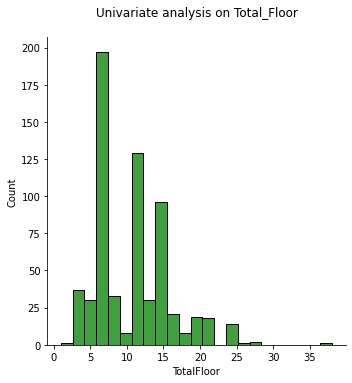

In [19]:
displot3=sns.displot(df['TotalFloor'],color='green')
displot3.set(title='Univariate analysis on Total_Floor\n')

[Text(0.5, 1.0, 'Scatter plot of Price & Sqft\n')]

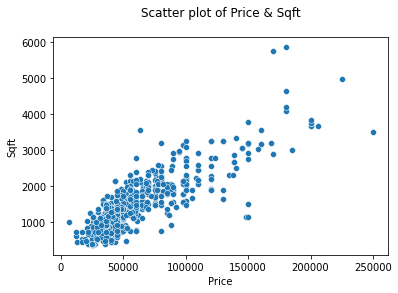

In [20]:
scatterplot1=sns.scatterplot(x=df['Price'],y=df['Sqft'])
scatterplot1.set(title='Scatter plot of Price & Sqft\n')

AttributeError: ignored

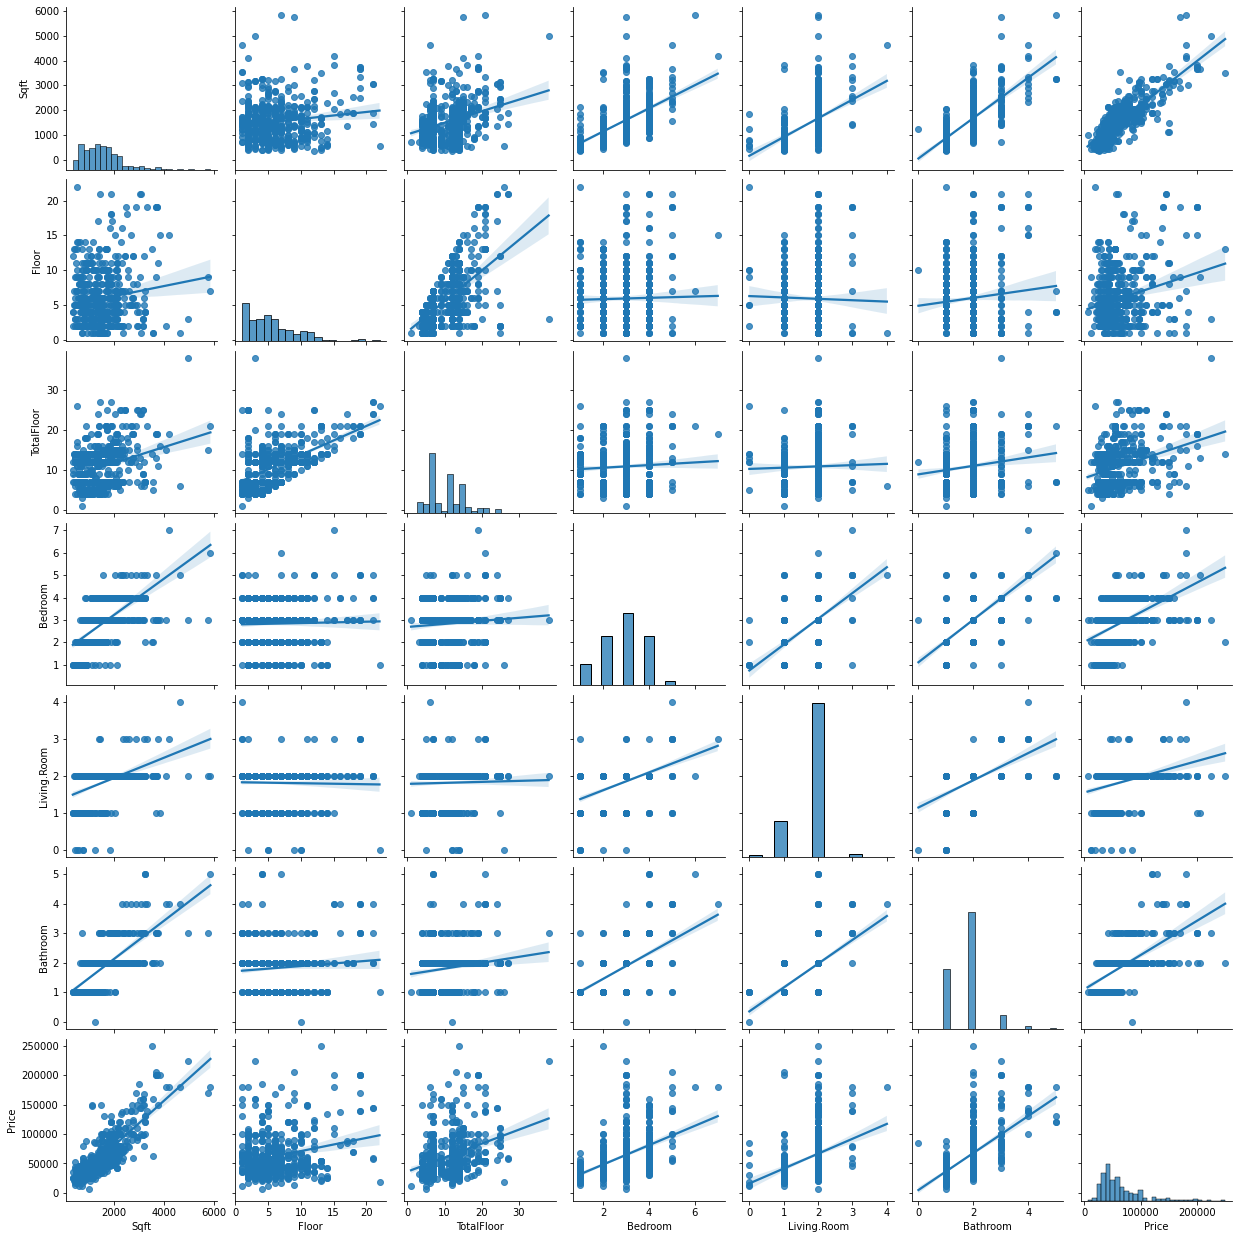

In [22]:
pairplot1=sns.pairplot(df,kind='reg')
pairplot1.fig.suptitle('Pairplot on grouped data\n',y=1.05,frontsize=40)

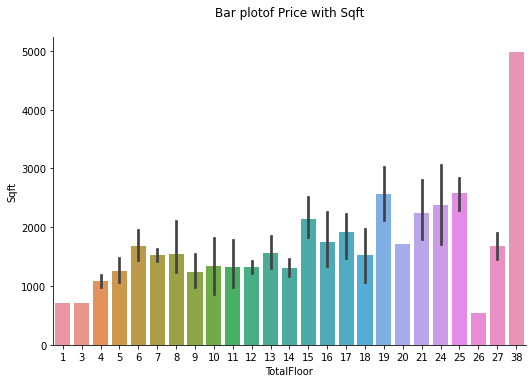

In [23]:
barplot1=sns.catplot(data=df,x='TotalFloor',y='Sqft',kind='bar',aspect=1.5)
barplot1.set(title='Bar plotof Price with Sqft\n')

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from math import sqrt

In [26]:
x=df[['Sqft','Floor','TotalFloor','Bedroom','Living.Room','Bathroom']]
y=df['Price']
print(x.shape,y.shape)

(645, 6) (645,)


In [27]:
x.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
1,1177.698,2,7,2,2,2
2,2134.800,5,7,4,2,2
3,1138.560,5,7,2,2,1
4,1458.780,2,7,3,2,2
5,967.776,11,14,3,2,2


In [28]:
y.head()

1    62000
2    78000
3    58000
4    45000
5    45000
Name: Price, dtype: int64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(516, 6) (129, 6) (516,) (129,)


In [30]:
x_train

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
378,1771.884,4,7,4,2,2
260,1387.620,2,7,3,2,2
470,1366.272,4,11,4,2,2
499,853.920,8,14,2,1,1
406,2052.966,5,7,4,2,2
...,...,...,...,...,...,...
373,925.080,2,4,2,1,1
324,1206.162,7,7,2,2,1
531,1433.874,5,6,3,2,2
127,1206.162,7,7,2,2,1


In [31]:
y_train

378    57000
260    45000
470    50000
499    42000
406    78000
       ...  
373    31800
324    59500
531    47000
127    57000
268    37000
Name: Price, Length: 516, dtype: int64

In [32]:
x_test

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom
412,925.080,4,13,2,2,1
446,2052.966,5,7,4,2,2
303,3664.740,9,13,5,1,2
28,3059.880,21,24,4,2,3
596,1102.980,2,4,2,2,2
...,...,...,...,...,...,...
505,3024.300,9,13,3,2,2
467,2067.198,4,14,4,2,2
112,2099.220,7,15,4,2,2
221,668.904,5,6,2,1,1


In [33]:
y_test

412     32000
446     78000
303    206000
28     145000
596     31000
        ...  
505    158000
467    100000
112     52000
221     28000
437     43000
Name: Price, Length: 129, dtype: int64

In [41]:
rmse_val = []  # To store RSME Value Of Different K.
for k in range(10): # Looping through values of K.
    k = k+1
    model = KNeighborsRegressor(n_neighbors = k) # Running KNeighborsRegressor with k neighbours.
    
    model.fit(x_train, y_train) # fit the Model.
    clf=model.predict(x_test) # Make Prediction On Test Set.
    error = sqrt(mean_squared_error(y_test, clf))  # Obtaining RSME for KNeighborsRegressor with k neighbours.
    rmse_val.append(error)  # Adding RMSE for k neighbours to rmse_val list.
    print('RMSE value for k=',k,'is:',error)

RMSE value for k= 1 is: 22002.21948300431
RMSE value for k= 2 is: 17699.214305088288
RMSE value for k= 3 is: 16676.553727587507
RMSE value for k= 4 is: 17904.794024697978
RMSE value for k= 5 is: 18301.896501093655
RMSE value for k= 6 is: 17099.26568833011
RMSE value for k= 7 is: 17138.993533639827
RMSE value for k= 8 is: 17293.868748800858
RMSE value for k= 9 is: 17435.222515466885
RMSE value for k= 10 is: 17669.156426648668


In [43]:
# Modelling using a k value of 2
model=KNeighborsRegressor(n_neighbors=2)
model.fit(x_train,y_train) # fitting the model
y_pred=model.predict(x_test) # predicting values

# calculating root mean squared error (RMSE)
error = sqrt(mean_squared_error(y_test,y_pred))
print(error)

17699.214305088288


In [44]:
print(min(rmse_val))

16676.553727587507


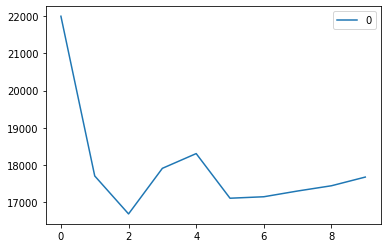

In [45]:
# Plotting the RMSE Values against K Values.
curve = pd.DataFrame(rmse_val)
curve.plot()

In [46]:
# Final predicted values
y_pred

array([ 38500. ,  77999.5, 200000. , 122500. ,  41888.5,  60000. ,
        45000. ,  34900. ,  43500. ,  80000. ,  47560. ,  17000. ,
        39000. ,  77999.5,  60000. ,  42000. ,  52999. ,  66500. ,
        23400. ,  55000. ,  68900. ,  40750. ,  17000. , 100000. ,
        30000. ,  33000. ,  48000. ,  71500. , 104000. ,  75000. ,
        42000. ,  55999.5,  23499.5,  84000. ,  43500. ,  46500. ,
        78000. ,  29400. ,  23400. ,  32500. , 100000. ,  81500. ,
        30000. ,  56000. ,  43500. , 130000. ,  58250. ,  95000. ,
        72500. ,  46500. ,  29000. ,  39000. ,  49800. ,  51500. ,
        80000. , 100000. , 100000. ,  47500. ,  59000. ,  55000. ,
        47500. ,  32500. ,  59999.5, 122500. ,  71500. ,  55000. ,
        31999.5, 124999.5,  55000. ,  43500. , 120000. ,  50000. ,
       110000. ,  68500. ,  43500. ,  23499.5,  34900. ,  49300. ,
        40900. ,  78000. ,  41888.5, 200000. ,  40500. ,  75000. ,
        28250. ,  70000. ,  42000. ,  82500. ,  49500. ,  2650

In [48]:
# Searching for an optimal value of K for KNN

# list of scores from k_range
k_range = range(10) 

# List to store scores
k_scores = []

# Looping through values of k
for k in k_range:
    # Running KNeighborsClassifier wih k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # Obtaining cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x, y, cv=15, scoring='accuracy')
    # Appending mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[nan, 0.24341085271317828, 0.17209302325581396, 0.15968992248062014, 0.14573643410852713, 0.14573643410852713, 0.1441860465116279, 0.1441860465116279, 0.15503875968992245, 0.14108527131782947]


Text(0, 0.5, 'Cross-Validated Accuracy')

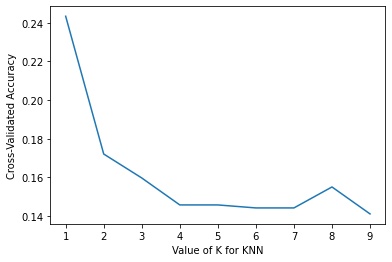

In [49]:
# Ploting the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [50]:
# Printing mean scores
print(scores.mean())

0.14108527131782947
